 # <div align="center">Flying Pigs</div>
 ### <div align="center"> House Prices: Advanced Regression Techniques </div>
<img src="http://s9.picofile.com/file/8338980150/House_price.png"></img>

 # <div align="center">1. Inicialización</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
train=pd.read_csv('train.csv')
train

,Id,Clasificación,Zona,Ancho de calle,Pies cuadrados terreno,Pavimento,Callejón,Relieve,Geografía del terreno,Utilidades,...,Pies cuadr. piscina,Calidad y condición piscina,Valla,Otras características,Valor otras caract.,Precio mensual,Precio anual,Tipo de venta,Condición venta,PrecioDeVenta
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [2]:
train.shape

(1460, 81)

In [3]:
test=pd.read_csv('test.csv')
test

,Id,Clasificación,Zona,Ancho de calle,Pies cuadrados terreno,Pavimento,Callejón,Relieve,Geografía del terreno,Utilidades,...,ScreenPorch,Pies cuadr. piscina,Calidad y condición piscina,Valla,Otras características,Valor otras caract.,Precio mensual,Precio anual,Tipo de venta,Condición venta
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


### Para facilitar el manejo de las variables, las imprimimos

In [4]:
train.columns

Index(['Id', 'Clasificación', 'Zona', 'Ancho de calle',
       'Pies cuadrados terreno', 'Pavimento', 'Callejón', 'Relieve',
       'Geografía del terreno', 'Utilidades', 'Localización', 'Pendiente',
       'Vecindario', 'Condición 1', 'Condición 2', 'Tipo de vivienda',
       'Plantas', 'Calidad vivienda', 'Calidad materiales',
       'Año de construcción', 'Año de reforma', 'Estilo tejado',
       'Material tejado', 'Primer revestimiento exterior',
       'Segundo revestimiento exterior', 'Tipo de bloque',
       'Cantidad bloques pies cuadrados', 'Calidad materiales exterior',
       'Condición materiales exterior', 'Base', 'Altura sótano',
       'Condición sótano', 'Puertecita sótano', 'Clasificación sótano zona1',
       'Pies cuadr. z1 sótano', 'Clasificación sótano zona2',
       'Pies cuadr. z2 sótano', 'Pies cuadr. sótano sin acabar',
       'Total pies cuadr. sótano', 'Tipo de calefacción',
       'Calidad y condición de la calefacción', 'Aire acondicionado',
       'Sistema

 # <div align="center">2. Visualizamos las propiedades de nuestra variable objetivo</div>


In [5]:
train['PrecioDeVenta'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: PrecioDeVenta, dtype: float64

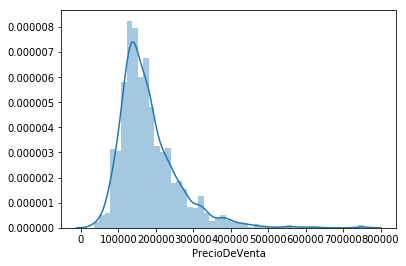

In [6]:

sns.distplot(train['PrecioDeVenta']);


In [7]:
#oblicuidad
print("Skewness: %f" % train['PrecioDeVenta'].skew())
#Curtosis
print("Kurtosis: %f" % train['PrecioDeVenta'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


 # <div align="center">3.Correlaciones</div>

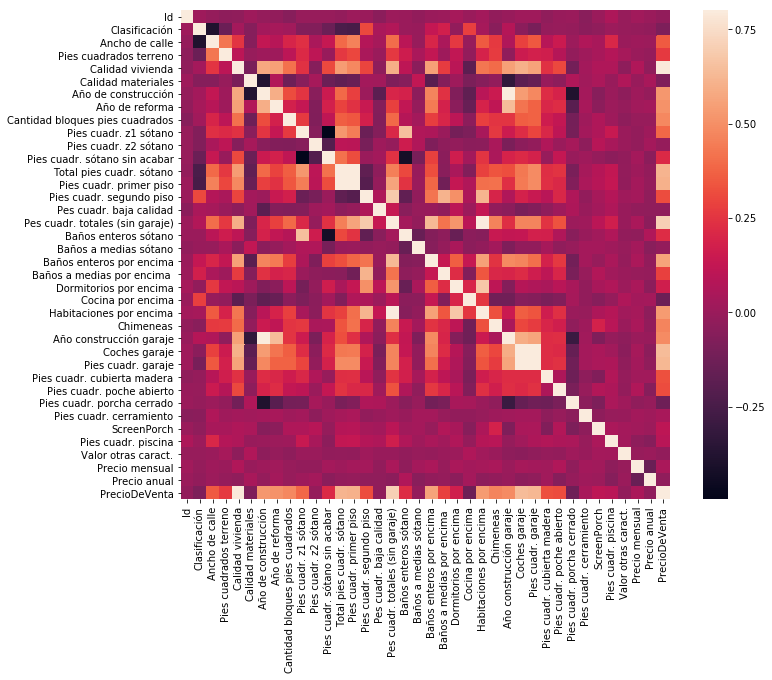

In [8]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [9]:

# Create correlation matrix
corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Encontramos variables cuya correlación sea mayor a 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
print(to_drop)
# Drop features 
train.drop(train[to_drop], axis=1,inplace = True)
test.drop(test[to_drop], axis=1,inplace = True)

['Pies cuadr. primer piso', 'Habitaciones por encima', 'Año construcción garaje', 'Pies cuadr. garaje']


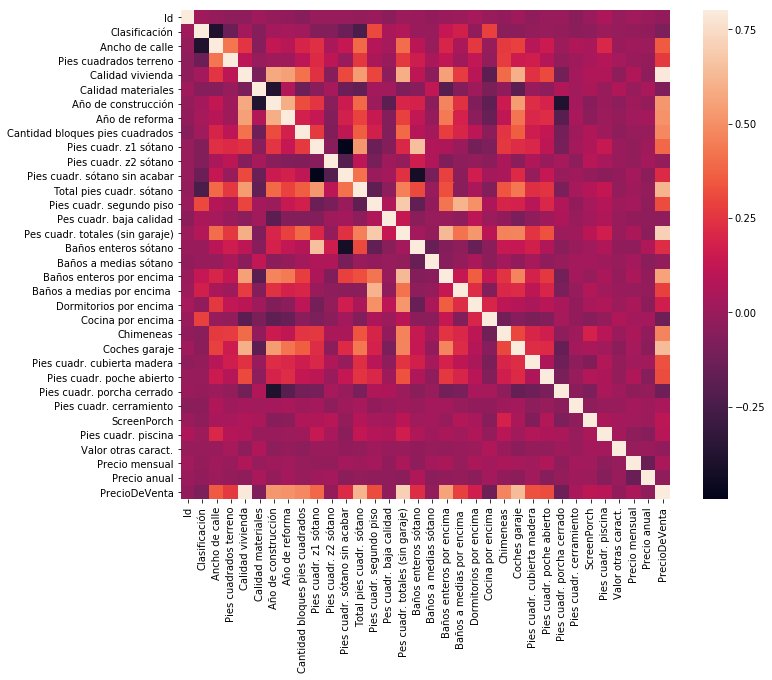

In [10]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [11]:
train.shape

(1460, 77)

 # <div align="center">4.Outliers</div>

### Los outliers son puntos que destacan por separarse mucho de la linea de regresión
### En este puntos buscaremos si hay alguno que pueda influir en nuestro resultado y borraremos el dato por completo
### Lo primero que haremos sera hacer una matriz de correlación, pero esta vez imprimiremos solo los 8 valores que mayor correlación tengan con PrecioDeVenta, ya que son las variables que nos importaran a la hora de buscar Outliers, ya que si la correlación con PrecioDeVenta es baja, no encontraremos ninguno, debido a que todos los puntos estaran muy dispersos

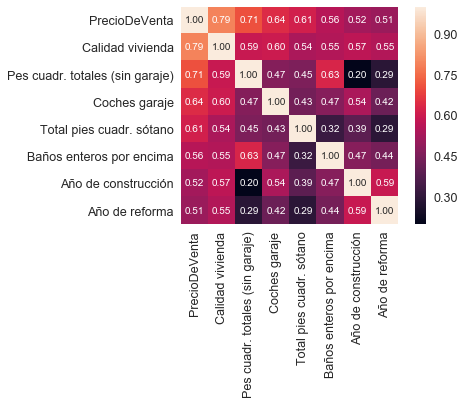

In [12]:
#Variables con correlacion alta con PrecioDeVenta
k = 8 
cols = corrmat.nlargest(k, 'PrecioDeVenta')['PrecioDeVenta'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### A continuación haremos la matriz de las gráficas de puntos de las variables que vimos que mayor correlación tenian con PrecioDeVenta

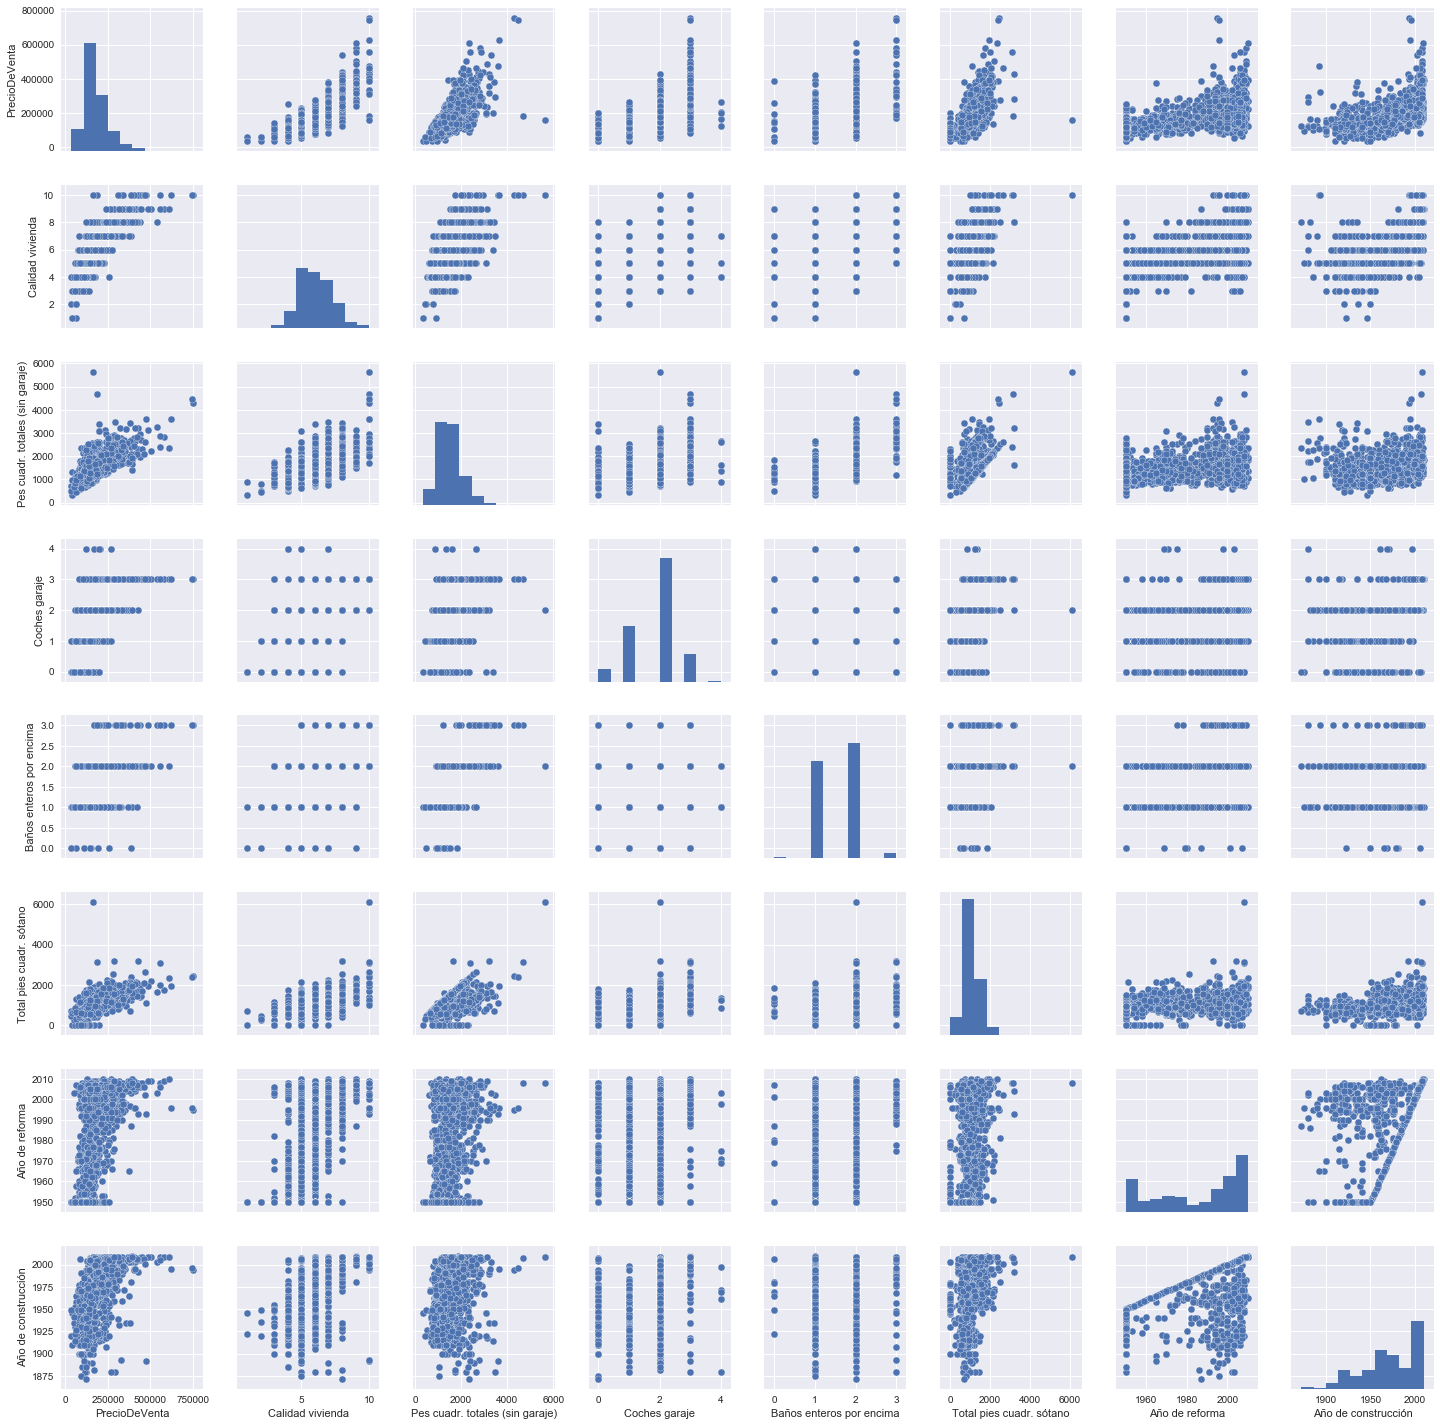

In [13]:
sns.set()
cols = ['PrecioDeVenta', 'Calidad vivienda', 'Pes cuadr. totales (sin garaje)', 'Coches garaje', 'Baños enteros por encima', 'Total pies cuadr. sótano','Año de reforma','Año de construcción']
sns.pairplot(train[cols], size = 2.5)
plt.show();

### Encontramos dos variables que tienen una muy fuerte correlación con precio de venta, pero a su vez tienen algunos puntos que no estan cerca de la línea de regresión, estos son Pes cuadr. totales (sin garaje) y Total pies cuadr. sótano.
### Ampliemos las gráficas a ver que averiguamos

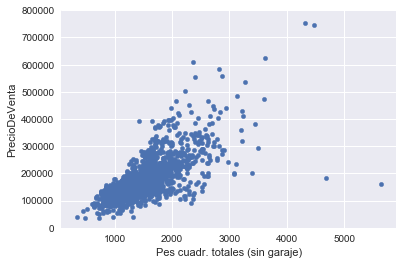

In [14]:
var = 'Pes cuadr. totales (sin garaje)'
data = pd.concat([train['PrecioDeVenta'], train[var]], axis=1)
data.plot.scatter(x=var, y='PrecioDeVenta', ylim=(0,800000));

### Encontramos dos Outliers en esta grafica, y procedemos a borrarlos, podriamos ir a la tabla y buscar la ID de los datos para asi borrarlos, pero mejor aun, podemos automatizar este proceso, poniendo que sección de la tabla queremos borrar, en este caso, que el eje x sea mayor a 4000 y  el eje Y menos a 300000

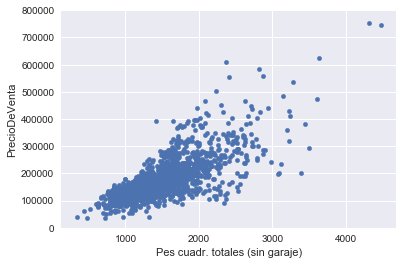

In [15]:
train = train.drop(train[(train['Pes cuadr. totales (sin garaje)']>4000) & (train['PrecioDeVenta']<300000)].index)
var = 'Pes cuadr. totales (sin garaje)'
data = pd.concat([train['PrecioDeVenta'], train[var]], axis=1)
data.plot.scatter(x=var, y='PrecioDeVenta', ylim=(0,800000));


### La otra variable que queremos estudiar es 'Total pies cuadr. sótano'

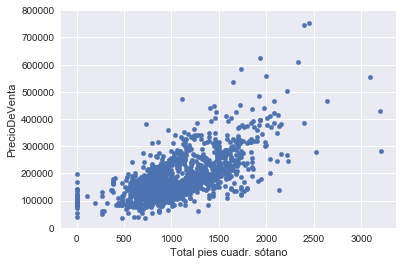

In [16]:

var = 'Total pies cuadr. sótano'
data = pd.concat([train['PrecioDeVenta'], train[var]], axis=1)
data.plot.scatter(x=var, y='PrecioDeVenta', ylim=(0,800000));

### Vemos que el Outlier que encontrabamos con anterioridad en la matriz, ya no esta, esto se debe a que coincidia con el outlier que borramos de la anterior variable, vemos que hay un par de puntos un poco dispersos, pero no consideramos que sea suficiente como para borrarlos.

 # <div align="center">5.Limpieza de los datos</div>

### Borramos la columna ID ya que no nos sirve para el modelo de predicción, aun y asi la guardamos a parte

In [17]:
#Numero de columnas
print("Tamaño del train.csv : {} ".format(train.shape))
print("Tamaño del test.csv: {} ".format(test.shape))

#Guardamos la columna de ID
train_ID = train['Id']
test_ID = test['Id']

#Borramos la columna id ya que no sirve para hacer predicciones
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#checkeamos el tamño tras quitar la columna ID
print("\nTamaño del train.csv tras borrar el ID : {} ".format(train.shape)) 
print("Tamaño del test.csv tras borrar el ID : {} ".format(test.shape))

Tamaño del train.csv : (1458, 77) 
Tamaño del test.csv: (1459, 76) 

Tamaño del train.csv tras borrar el ID : (1458, 76) 
Tamaño del test.csv tras borrar el ID : (1459, 75) 


### Para proceder a la limpieza de los datos, lo primero que haremos sera concatenar el dataframe train con el test, para limpiar las dos tablas a la vez, además deberemos de borrar la columna de 'PrecioDeVenta' de esta concatenación, ya que el dataframe Test no la contiene.

In [18]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.PrecioDeVenta.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['PrecioDeVenta'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 75)


### A continuación veremos la cantidad de datos que faltan en cada una de las variables

In [19]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
Calidad y condición piscina,99.691464
Otras características,96.400411
Callejón,93.212204
Valla,80.425094
Calidad chimeneas,48.680151
Ancho de calle,16.660953
Calidad garaje,5.450806
Situación garaje,5.450806
Condición garaje,5.450806
Tipo de garaje,5.382242


Text(0.5,1,'Percent missing data by feature')

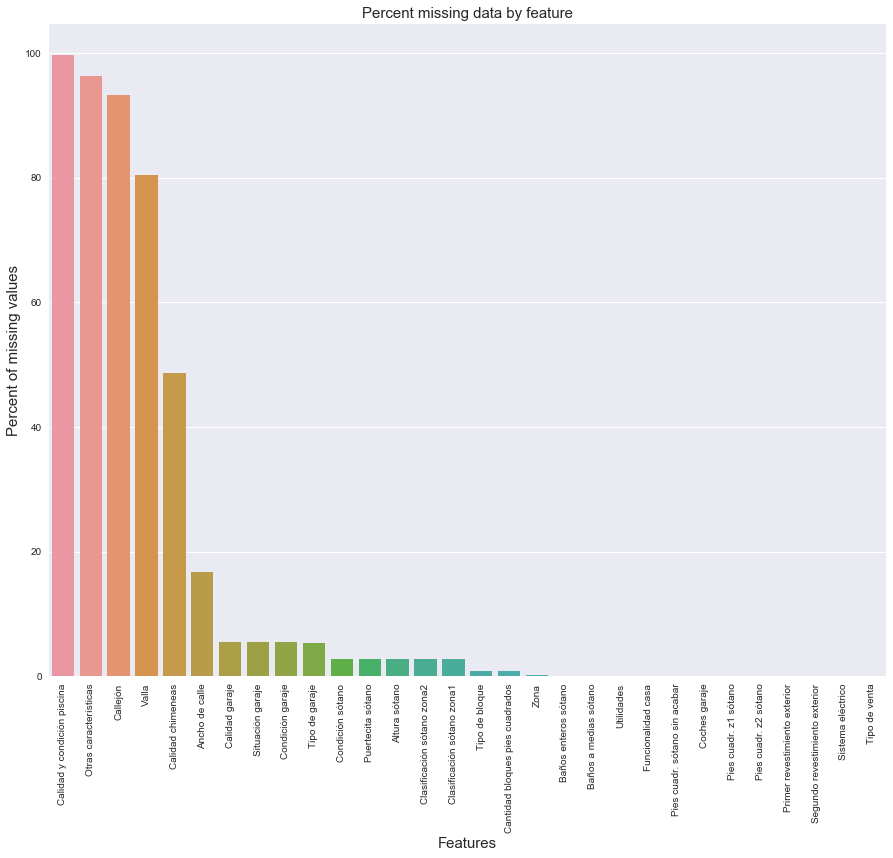

In [20]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [21]:
#NA significa sin piscina por lo que lo cambiamos por None
all_data["Calidad y condición piscina"] = all_data["Calidad y condición piscina"].fillna("None")

In [22]:
#NA significa que no tiene características extras por lo que lo cambiamos por None
all_data["Otras características"] = all_data["Otras características"].fillna("None")

In [23]:
#NA significa que no tiene acceso por callejon por lo que lo cambiamos por None
all_data["Callejón"] = all_data["Callejón"].fillna("None")

In [24]:
#NA significa que no tiene valla por lo que lo cambiamos por None
all_data["Valla"] = all_data["Valla"].fillna("None")

In [25]:
#NA significa que no tiene chimenea por lo que lo cambiamos por None
all_data["Calidad chimeneas"] = all_data["Calidad chimeneas"].fillna("None")

In [26]:
#No sabemos el dato, pero si que sabemos el ancho de la calle de otras casas del barrio, por lo que usaremos la mediana
#de ancho de la calle del barrio para estimar el ancho de la calle
all_data["Ancho de calle"] = all_data.groupby("Vecindario")["Ancho de calle"].transform(
    lambda x: x.fillna(x.median()))

In [27]:
for col in ('Tipo de garaje', 'Condición garaje', 'Calidad garaje', 'Situación garaje'):
    all_data[col] = all_data[col].fillna('None')

In [28]:
all_data['Coches garaje'] = all_data['Coches garaje'].fillna(0)

In [29]:
for col in ('Pies cuadr. z1 sótano', 'Pies cuadr. z2 sótano', 'Pies cuadr. sótano sin acabar','Total pies cuadr. sótano', 'Baños enteros sótano', 'Baños a medias sótano'):
    all_data[col] = all_data[col].fillna(0)

In [30]:
for col in ('Altura sótano', 'Condición sótano', 'Puertecita sótano', 'Clasificación sótano zona1', 'Clasificación sótano zona2'):
    all_data[col] = all_data[col].fillna('None')

In [31]:
all_data["Tipo de bloque"] = all_data["Tipo de bloque"].fillna("None")
all_data["Cantidad bloques pies cuadrados"] = all_data["Cantidad bloques pies cuadrados"].fillna(0)

In [32]:
all_data['Zona'] = all_data['Zona'].fillna(all_data['Zona'].mode()[0])

In [33]:
#borrar, solo varia en el train
all_data = all_data.drop(['Utilidades'], axis=1)

In [34]:
#Na-Tipico
all_data["Funcionalidad casa"] = all_data["Funcionalidad casa"].fillna("Typ")

In [35]:
all_data['Sistema eléctrico'] = all_data['Sistema eléctrico'].fillna(all_data['Sistema eléctrico'].mode()[0])

In [36]:
#solo 1 NA moda
all_data['Calidad cocina'] = all_data['Calidad cocina'].fillna(all_data['Calidad cocina'].mode()[0])

In [37]:
all_data['Primer revestimiento exterior'] = all_data['Primer revestimiento exterior'].fillna(all_data['Primer revestimiento exterior'].mode()[0])
all_data['Segundo revestimiento exterior'] = all_data['Segundo revestimiento exterior'].fillna(all_data['Segundo revestimiento exterior'].mode()[0])

In [38]:
all_data['Tipo de venta'] = all_data['Tipo de venta'].fillna(all_data['Tipo de venta'].mode()[0])

In [39]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio


 # <div align="center">6. Extras</div>

In [44]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)


(2917, 295)
